# Análise superficial e não revela insights significativos.

In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [253]:
url = 'data.csv'

header = ['genero', 'etnia', 'estado_civil', 'deficiencia', 'orientacao', 'vulnerabilidade', 'formacao', 'experiencia', 'estado', 'idiomas', 'ensino', 'curso']

df = pd.read_csv(url, header=None, names=header)

df.head()

,genero,etnia,estado_civil,deficiencia,orientacao,vulnerabilidade,formacao,experiencia,estado,idiomas,ensino,curso
0,feminino,pardo,divorciado,nao,outro,nao,tecnologo,nao,MS,ingles,FIAP,engenharia
1,outro,amarelo,solteiro,deficiencia intelectual,bissexual,nao,especializacao,nao,PE,mandarim,UNIP,engenharia
2,prefiro nao informar,amarelo,divorciado,deficiencia fisica,heterossexual,orientacao sexual,doutorado,sim,PA,mandarim,UNINOVE,turismo
3,masculino,branco,casado,nao,heterossexual,territorial,doutorado,sim,PA,alemao,UNINOVE,veterinaria
4,masculino,branco,viuvo,deficiencia intelectual,prefiro nao informar,etnia,tecnologo,nao,AP,japones,PUC,medicina


In [196]:
df.tail()

,genero,etnia,estado_civil,deficiencia,orientacao,vulnerabilidade,formacao,experiencia,estado,idiomas,ensino,curso
496,nao-binario,negro,solteiro,nao,assexual,orientacao sexual,tecnologo,nao,PI,ingles,UNIP,enfermagem
497,nao-binario,pardo,divorciado,deficiencia auditiva,prefiro nao informar,orientacao sexual,doutorado,nao,RO,alemao,UNESP,engenharia
498,masculino,outro,divorciado,nao,heterossexual,nao,mestrado,nao,PR,alemao,FIAP,turismo
499,feminino,pardo,divorciado,deficiencia fisica,pansexual,orientacao sexual,mestrado,nao,AM,alemao,USP,sistemas de informacao
500,nao-binario,amarelo,divorciado,deficiencia fisica,bissexual,genero,especializacao,nao,SP,ingles,USP,sistemas de informacao


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   genero           501 non-null    object
 1   etnia            501 non-null    object
 2   estado_civil     501 non-null    object
 3   deficiencia      501 non-null    object
 4   orientacao       501 non-null    object
 5   vulnerabilidade  501 non-null    object
 6   formacao         501 non-null    object
 7   experiencia      501 non-null    object
 8   estado           501 non-null    object
 9   idiomas          501 non-null    object
 10  ensino           501 non-null    object
 11  curso            501 non-null    object
dtypes: object(12)
memory usage: 47.1+ KB


# Análise

In [199]:
df.describe()

,genero,etnia,estado_civil,deficiencia,orientacao,vulnerabilidade,formacao,experiencia,estado,idiomas,ensino,curso
count,501,501,501,501,501,501,501,501,501,501,501,501
unique,6,6,4,5,7,5,7,2,27,6,6,7
top,masculino,amarelo,divorciado,nao,pansexual,genero,especializacao,nao,AC,nao,UNESP,pedagogia
freq,95,89,137,109,87,117,79,287,29,98,97,84


In [200]:
df.isnull().sum()

genero             0
etnia              0
estado_civil       0
deficiencia        0
orientacao         0
vulnerabilidade    0
formacao           0
experiencia        0
estado             0
idiomas            0
ensino             0
curso              0
dtype: int64

Contagem de Gênero em gráfico

In [201]:
df['genero'].value_counts()

masculino               95
prefiro nao informar    86
nao-binario             84
transgenero             84
feminino                78
outro                   74
Name: genero, dtype: int64

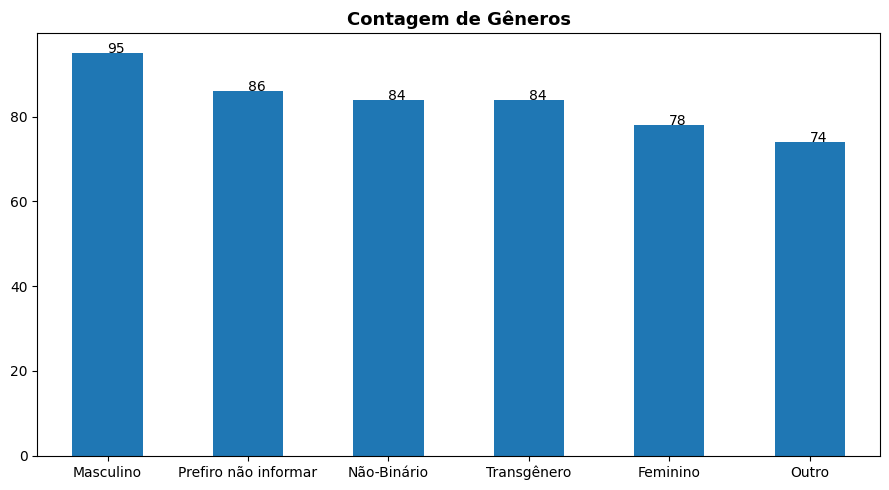

In [202]:
fig, ax = plt.subplots(figsize=(9,5))
name = ['Masculino', 'Prefiro não informar', 'Não-Binário', 'Transgênero', 'Feminino', 'Outro']
ax = df.genero.value_counts().plot(kind='bar')
ax.set_title('Contagem de Gêneros', fontsize = 13, weight = 'bold')
ax.set_xticklabels(name, rotation = 0)

for p in ax.patches:
  ax.annotate(format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.tight_layout()

Contagem de Etnia em gráfico

In [203]:
df['etnia'].value_counts()

amarelo     89
branco      88
pardo       87
indigena    82
outro       78
negro       77
Name: etnia, dtype: int64

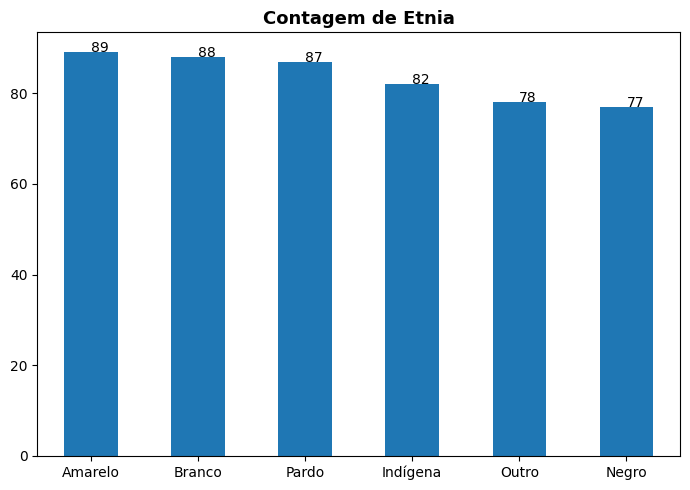

In [204]:
fig, ax = plt.subplots(figsize=(7,5))
name = ['Amarelo', 'Branco', 'Pardo', 'Indígena', 'Outro', 'Negro']
ax = df.etnia.value_counts().plot(kind='bar')
ax.set_title('Contagem de Etnia', fontsize = 13, weight = 'bold')
ax.set_xticklabels(name, rotation = 0)

for p in ax.patches:
  ax.annotate(format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.tight_layout()

Contagem de Estado Civil em gráfico

In [205]:
df['estado_civil'].value_counts()

divorciado    137
solteiro      134
casado        117
viuvo         113
Name: estado_civil, dtype: int64

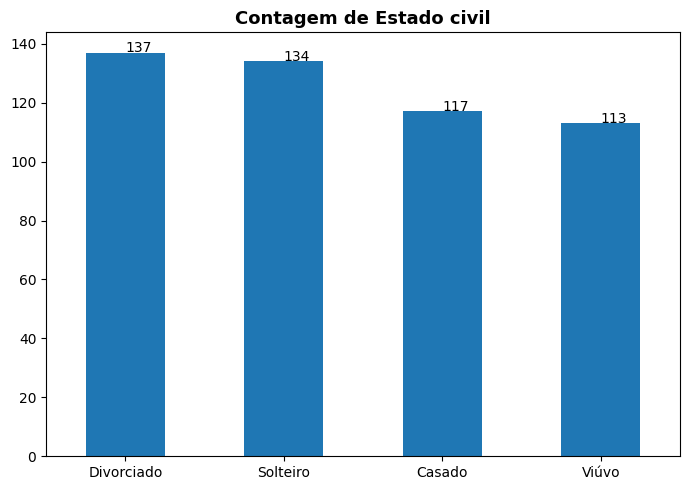

In [206]:
fig, ax = plt.subplots(figsize=(7,5))
name = ['Divorciado', 'Solteiro', 'Casado', 'Viúvo']
ax = df.estado_civil.value_counts().plot(kind='bar')
ax.set_title('Contagem de Estado civil', fontsize = 13, weight = 'bold')
ax.set_xticklabels(name, rotation = 0)

for p in ax.patches:
  ax.annotate(format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.tight_layout()

Contagem de deficiências em gráfico

In [207]:
df['deficiencia'].value_counts()

nao                        109
deficiencia auditiva       105
deficiencia visual         105
deficiencia fisica         101
deficiencia intelectual     81
Name: deficiencia, dtype: int64

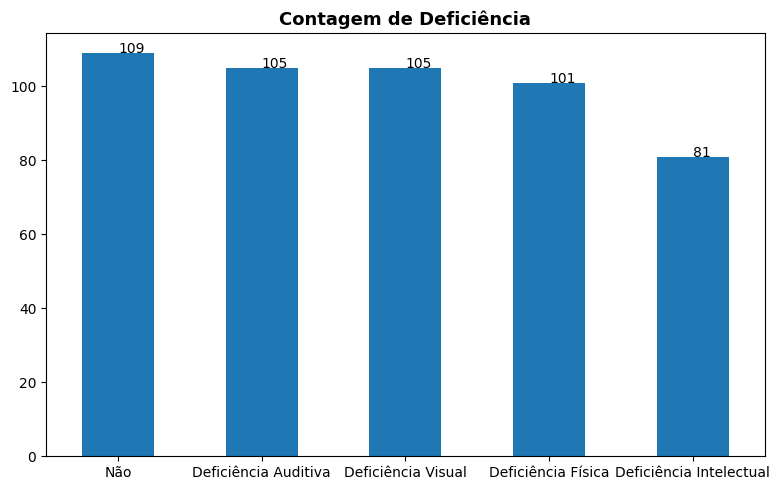

In [208]:
fig, ax = plt.subplots(figsize=(8,5))
name = ['Não', 'Deficiência Auditiva', 'Deficiência Visual', 'Deficiência Física', 'Deficiência Intelectual']
ax = df.deficiencia.value_counts().plot(kind='bar')
ax.set_title('Contagem de Deficiência', fontsize = 13, weight = 'bold')
ax.set_xticklabels(name, rotation = 0)

for p in ax.patches:
  ax.annotate(format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.tight_layout()

Contagem de Orientação Sexual em gráfico

In [209]:
df['orientacao'].value_counts()

pansexual               87
heterossexual           76
prefiro nao informar    71
assexual                71
outro                   68
bissexual               66
homossexual             62
Name: orientacao, dtype: int64

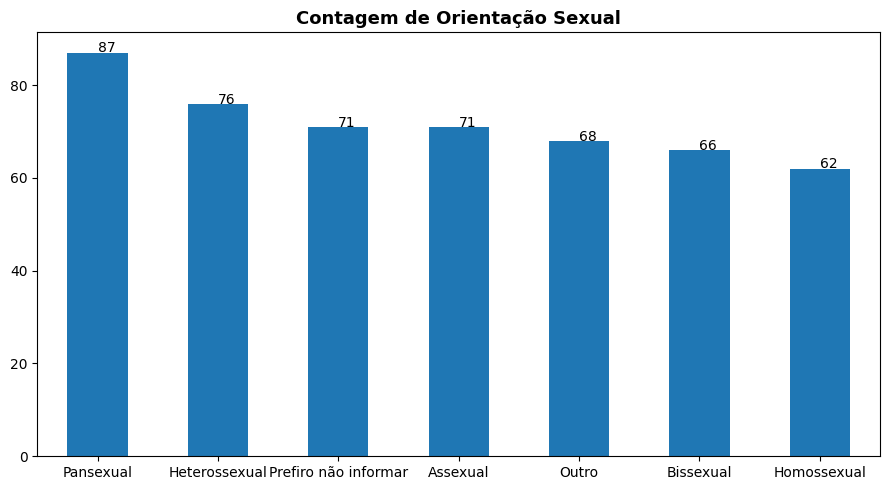

In [210]:
fig, ax = plt.subplots(figsize=(9,5))
name = ['Pansexual', 'Heterossexual', 'Prefiro não informar', 'Assexual', 'Outro', 'Bissexual', 'Homossexual']
ax = df.orientacao.value_counts().plot(kind='bar')
ax.set_title('Contagem de Orientação Sexual', fontsize = 13, weight = 'bold')
ax.set_xticklabels(name, rotation = 0)

for p in ax.patches:
  ax.annotate(format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.tight_layout()

Contagem de Vulnerabilidades Sociais em gráfico

In [211]:
df['vulnerabilidade'].value_counts()

genero               117
etnia                112
orientacao sexual     97
territorial           92
nao                   83
Name: vulnerabilidade, dtype: int64

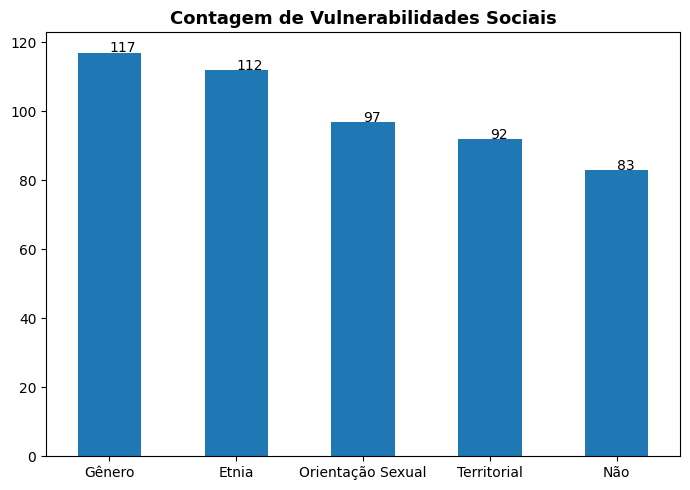

In [212]:
fig, ax = plt.subplots(figsize=(7,5))
name = ['Gênero', 'Etnia', 'Orientação Sexual', 'Territorial', 'Não']
ax = df.vulnerabilidade.value_counts().plot(kind='bar')
ax.set_title('Contagem de Vulnerabilidades Sociais', fontsize = 13, weight = 'bold')
ax.set_xticklabels(name, rotation = 0)

for p in ax.patches:
  ax.annotate(format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.tight_layout()

Contagem de Formação em gráfico

In [213]:
df['formacao'].value_counts()

especializacao    79
doutorado         77
bacharelado       76
MBA               71
tecnologo         70
licenciatura      67
mestrado          61
Name: formacao, dtype: int64

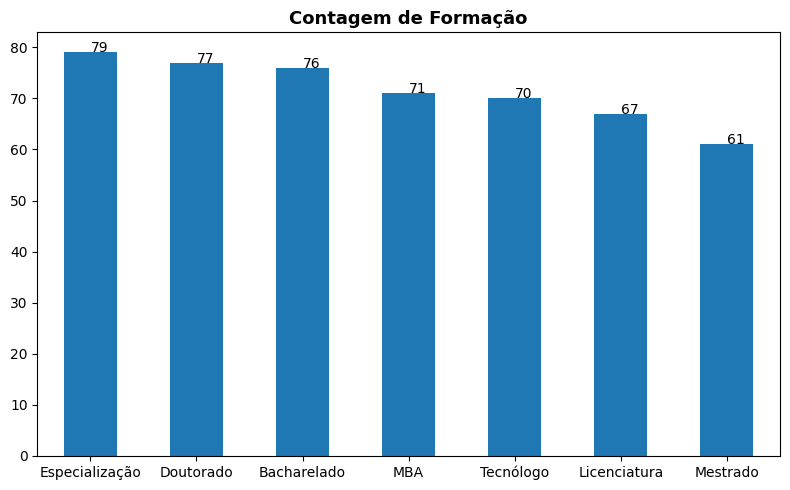

In [214]:
fig, ax = plt.subplots(figsize=(8,5))
name = ['Especialização', 'Doutorado', 'Bacharelado', 'MBA', 'Tecnólogo', 'Licenciatura', 'Mestrado']
ax = df.formacao.value_counts().plot(kind='bar')
ax.set_title('Contagem de Formação', fontsize = 13, weight = 'bold')
ax.set_xticklabels(name, rotation = 0)

for p in ax.patches:
  ax.annotate(format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.tight_layout()

Contagem de Experiência Profissional em Gráfico

In [215]:
df['experiencia'].value_counts()

nao    287
sim    214
Name: experiencia, dtype: int64

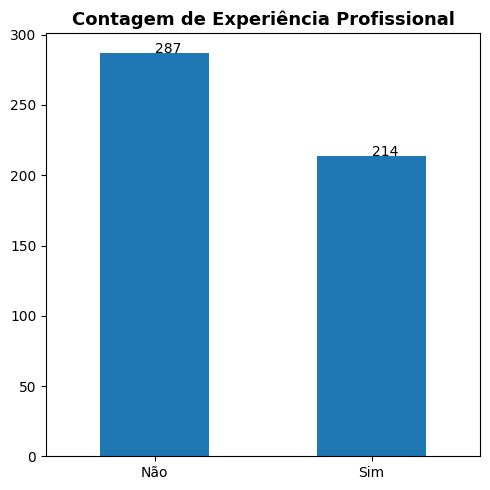

In [216]:
fig, ax = plt.subplots(figsize=(5,5))
name = ['Não', 'Sim']
ax = df.experiencia.value_counts().plot(kind='bar')
ax.set_title('Contagem de Experiência Profissional', fontsize = 13, weight = 'bold')
ax.set_xticklabels(name, rotation = 0)

for p in ax.patches:
  ax.annotate(format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.tight_layout()

Contagem de Estados em gráfico

In [217]:
df['estado'].value_counts()

AC    29
AM    24
RS    23
SP    23
MS    22
PR    20
CE    20
BA    20
RN    20
MG    20
RJ    20
RR    20
PI    20
AP    20
TO    19
DF    19
MA    18
ES    18
SE    17
PA    17
GO    16
PE    16
MT    14
Al    14
RO    13
PB    10
SC     9
Name: estado, dtype: int64

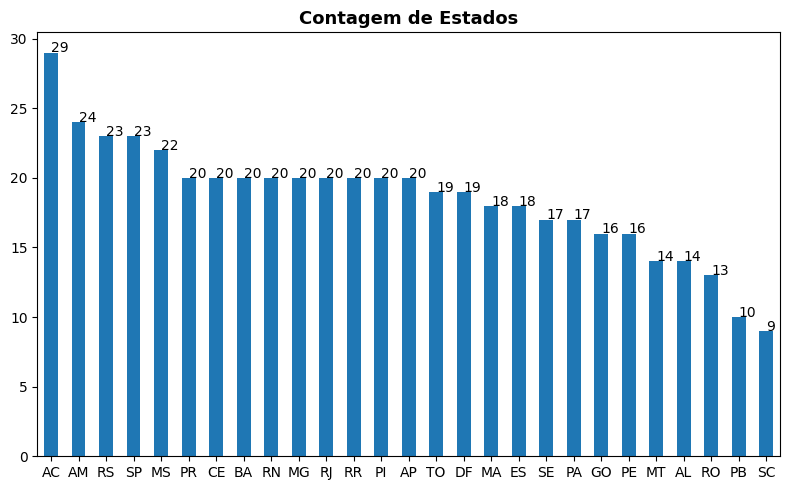

In [218]:
fig, ax = plt.subplots(figsize=(8,5))
name = ['AC', 'AM', 'RS', 'SP', 'MS', 'PR', 'CE', 'BA', 'RN', 'MG', 'RJ', 'RR', 'PI', 'AP', 'TO', 'DF', 'MA', 'ES', 'SE', 'PA', 'GO', 'PE', 'MT', 'AL', 'RO', 'PB', 'SC']
ax = df.estado.value_counts().plot(kind='bar')
ax.set_title('Contagem de Estados', fontsize = 13, weight = 'bold')
ax.set_xticklabels(name, rotation = 0)

for p in ax.patches:
  ax.annotate(format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.tight_layout()

Contagem de Idiomas em gráfico

In [219]:
df['idiomas'].value_counts()

nao         98
japones     92
ingles      84
alemao      77
mandarim    75
espanhol    75
Name: idiomas, dtype: int64

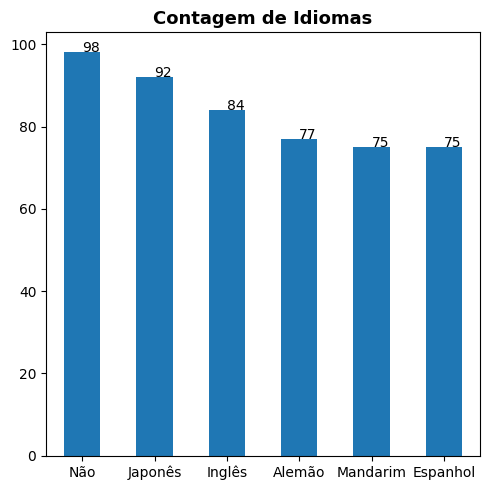

In [220]:
fig, ax = plt.subplots(figsize=(5,5))
name = ['Não', 'Japonês', 'Inglês', 'Alemão', 'Mandarim', 'Espanhol']
ax = df.idiomas.value_counts().plot(kind='bar')
ax.set_title('Contagem de Idiomas', fontsize = 13, weight = 'bold')
ax.set_xticklabels(name, rotation = 0)

for p in ax.patches:
  ax.annotate(format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.tight_layout()

Contagem de Instituições de ensino

In [221]:
df['ensino'].value_counts()

UNESP      97
UNIP       93
USP        84
PUC        79
UNINOVE    78
FIAP       70
Name: ensino, dtype: int64

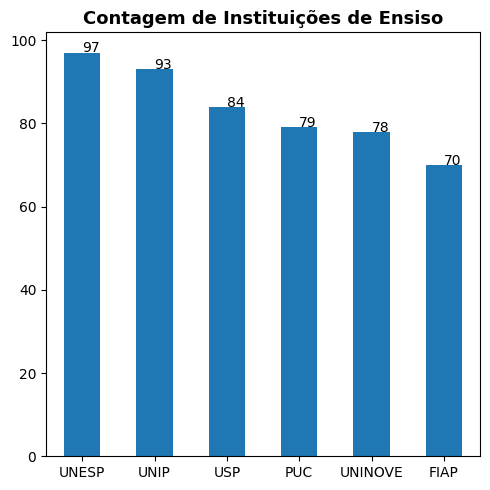

In [222]:
fig, ax = plt.subplots(figsize=(5,5))
name = ['UNESP', 'UNIP', 'USP', 'PUC', 'UNINOVE', 'FIAP']
ax = df.ensino.value_counts().plot(kind='bar')
ax.set_title('Contagem de Instituições de Ensiso', fontsize = 13, weight = 'bold')
ax.set_xticklabels(name, rotation = 0)

for p in ax.patches:
  ax.annotate(format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.tight_layout()

Contagem de cursos em gráfico

In [223]:
df['curso'].value_counts()

pedagogia                 84
engenharia                79
turismo                   75
veterinaria               72
sistemas de informacao    69
medicina                  62
enfermagem                60
Name: curso, dtype: int64

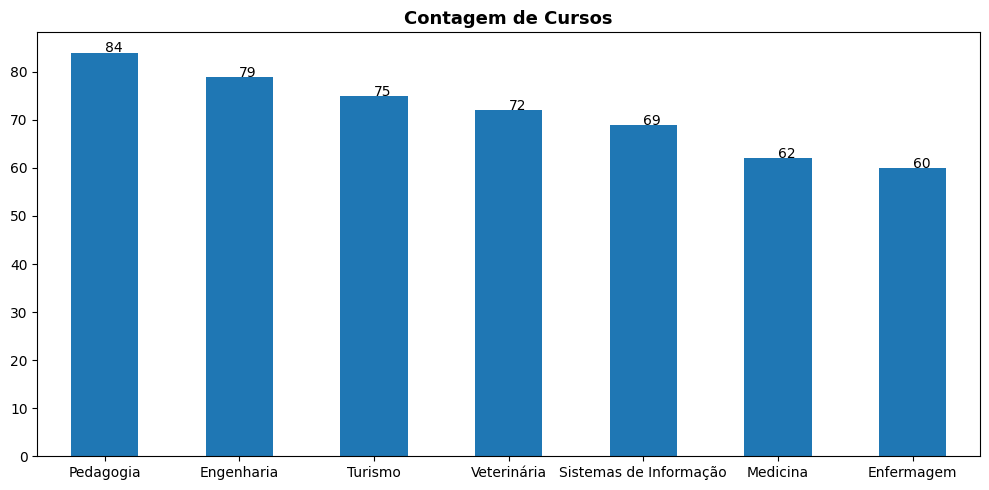

In [224]:
fig, ax = plt.subplots(figsize=(10,5))
name = ['Pedagogia', 'Engenharia', 'Turismo', 'Veterinária', 'Sistemas de Informação', 'Medicina','Enfermagem']
ax = df.curso.value_counts().plot(kind='bar')
ax.set_title('Contagem de Cursos', fontsize = 13, weight = 'bold')
ax.set_xticklabels(name, rotation = 0)

for p in ax.patches:
  ax.annotate(format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.tight_layout()

Grafico vulnerabilidades/genero

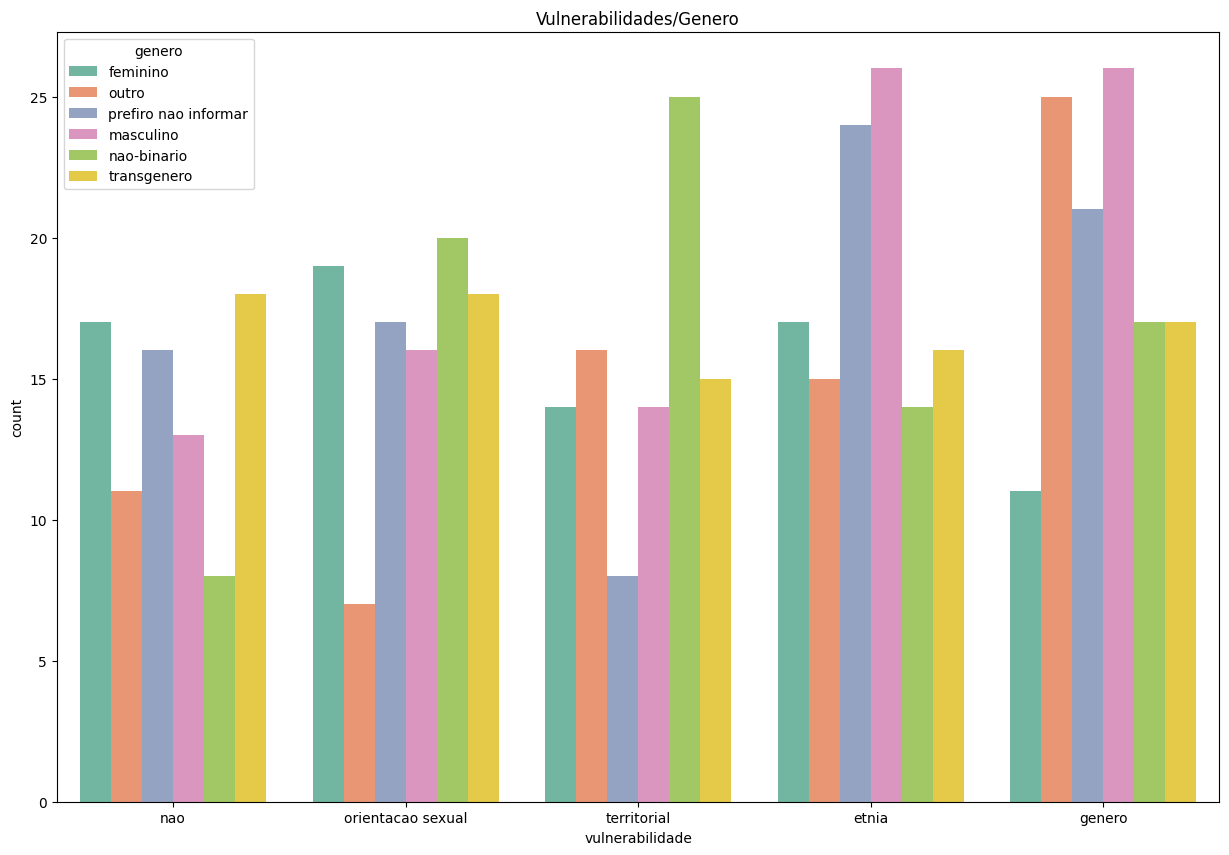

In [226]:
fig, ax = plt.subplots(figsize = (15,10))
name = df['vulnerabilidade']
ax = sns.countplot(x='vulnerabilidade', hue='genero', data=df, palette='Set2')
ax.set_title("Vulnerabilidades/Genero")
plt.show()

Grafico vulnerabilidades/Etnia

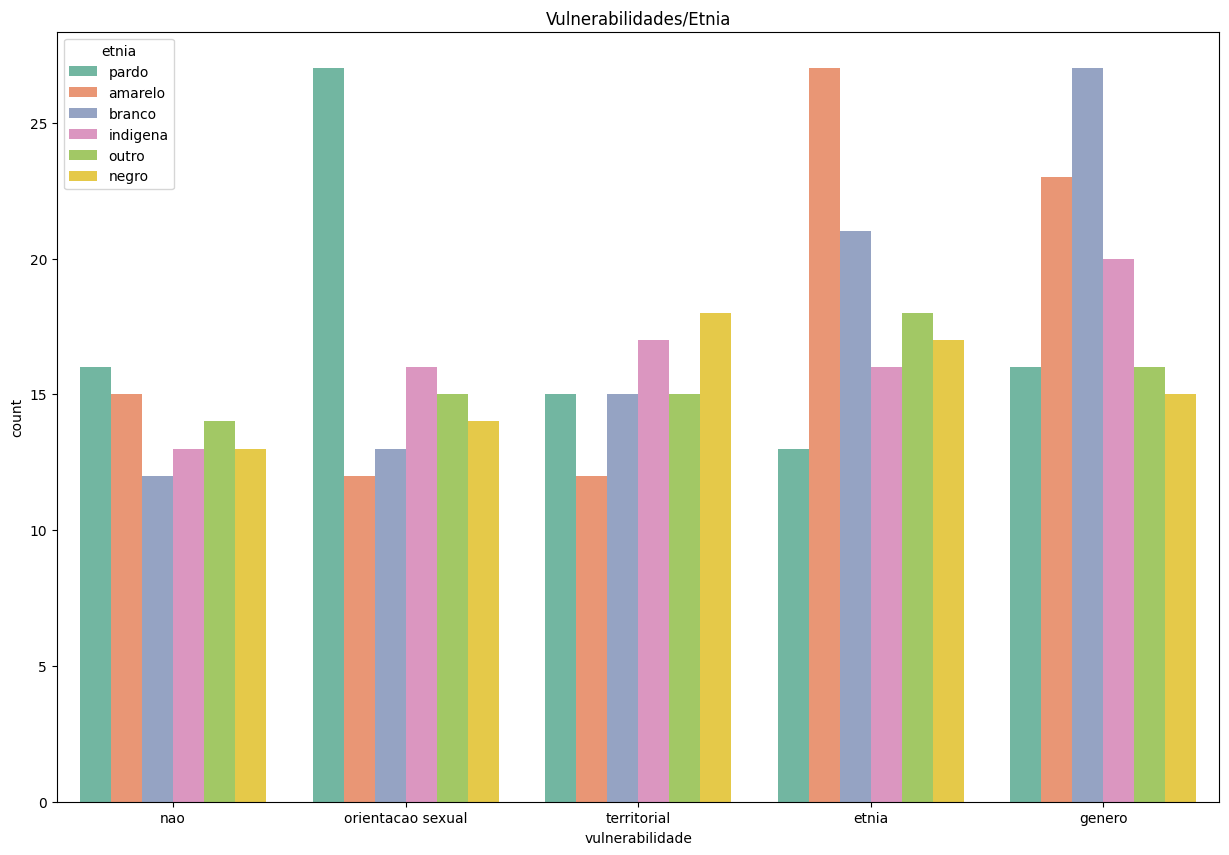

In [228]:
fig, ax = plt.subplots(figsize = (15,10))
name = df['vulnerabilidade']
ax = sns.countplot(x='vulnerabilidade', hue='etnia', data=df, palette='Set2')
ax.set_title("Vulnerabilidades/Etnia")
plt.show()

Grafico vulnerabilidades/Orientacao sexual

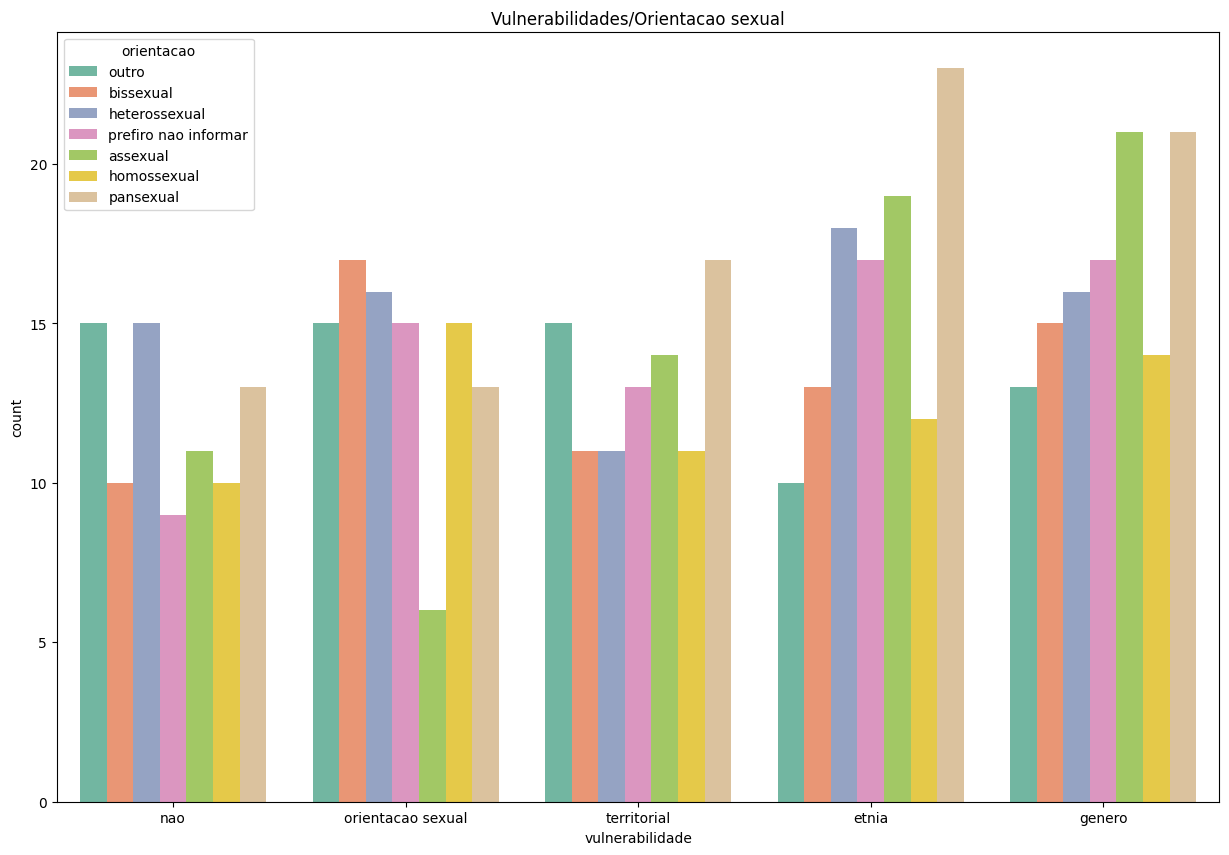

In [254]:
fig, ax = plt.subplots(figsize = (15,10))
name = df['vulnerabilidade']
ax = sns.countplot(x='vulnerabilidade', hue='orientacao', data=df, palette='Set2')
ax.set_title("Vulnerabilidades/Orientacao sexual")
plt.show()

# Correlação entre atributos

In [231]:
df['genero'] = df.genero.replace({'masculino': 1, 'feminino': 2, 'transgenero': 3, 'nao-binario': 4, 'outro': 5, 'prefiro nao informar': 6})
df['etnia'] = df.etnia.replace({'branco': 1, 'negro': 2, 'pardo': 3, 'indigena': 4, 'amarelo': 5, 'outro': 6})
df['estado_civil'] = df.estado_civil.replace({'solteiro': 1, 'casado': 2, 'divorciado': 3, 'viuvo': 4})
df['deficiencia'] = df.deficiencia.replace({'nao': 1, 'deficiencia fisica': 2, 'deficiencia intelectual': 3, 'deficiencia auditiva': 4, 'deficiencia visual': 5})
df['orientacao'] = df.orientacao.replace({'heterossexual': 1, 'homossexual': 2, 'bissexual': 3, 'assexual': 4, 'pansexual': 5, 'outro': 6, 'prefiro nao informar': 7})
df['vulnerabilidade'] = df.vulnerabilidade.replace({'nao': 1, 'territorial': 2, 'genero': 3, 'orientacao sexual': 4, 'etnia': 5})
df['formacao'] = df.formacao.replace({'bacharelado': 1, 'licenciatura': 2, 'tecnologo': 3, 'especializacao': 4, 'MBA': 5, 'mestrado': 6, 'doutorado': 7})
df['curso'] = df.curso.replace({'engenharia': 1, 'sistemas de informacao': 2, 'pedagogia': 3, 'medicina': 4, 'enfermagem': 5, 'veterinaria': 6, 'turismo': 7})
df['ensino'] = df.ensino.replace({'USP': 1, 'PUC': 2, 'UNESP': 3, 'FIAP': 4, 'UNIP': 5, 'UNINOVE': 6})
df['idiomas'] = df.idiomas.replace({'nao': 1, 'espanhol': 2, 'ingles': 3, 'mandarim': 4, 'japones': 5, 'alemao': 6})
df['experiencia'] = df.experiencia.replace({'sim': 1, 'nao': 2})
df['estado'] = df.estado.replace({'AC': 1, 'Al': 2, 'AP': 3, 'AM': 4, 'BA': 5, 'CE': 6, 'ES': 7, 'GO': 8, 'MA': 9, 'MT': 10, 'MS': 11, 'MG': 12, 'PA': 13, 'PB': 14, 'PR': 15, 'PE': 16, 'PI': 17, 'RJ': 18, 'RN': 19, 'RS': 20, 'RO': 21, 'RR': 22, 'SC': 23, 'SP': 24, 'SE': 25, 'TO': 26, 'DF': 27})

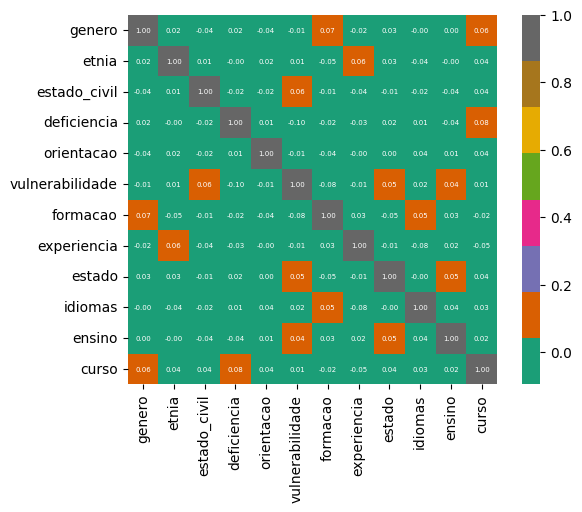

In [235]:
corr_matx = df.corr()

heatmap = sns.heatmap(corr_matx,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 5},yticklabels=cols,xticklabels=cols,cmap='Dark2')

Podemos abservar que nenhum dos atributos tem correlação forte.



# KNeighborsClassifier

In [171]:
X = df[['genero', 'orientacao', 'etnia']]
y = df['vulnerabilidade']
print(f"Formato das tabelas de dados {X.shape} e classes {y.shape}")


Formato das tabelas de dados (501, 3) e classes (501,)


In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Formato das tabelas de dados de treino {X_train.shape} e teste {X_test.shape}")



Formato das tabelas de dados de treino (400, 3) e teste (101, 3)


In [151]:
k = 9
model = KNeighborsClassifier(n_neighbors=k)

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [152]:
y_pred = model.predict(X_test)
print("Predição: {}".format(y_pred))

Predição: [4 2 2 5 1 5 2 2 1 5 1 5 3 2 2 2 4 3 5 3 2 4 2 2 5 3 1 4 5 5 3 2 2 4 2 1 5
 1 5 3 5 2 4 2 4 3 5 4 3 1 2 1 3 5 1 2 3 3 4 4 4 1 4 1 4 1 3 2 2 3 4 4 4 2
 4 1 2 4 4 1 3 3 5 4 5 4 4 3 5 2 3 2 2 2 4 4 4 1 5 2 3]


In [153]:
accuracy = accuracy_score(y_test, y_pred)
print("Acerto médio de classificação: ", accuracy)

Acerto médio de classificação:  0.2376237623762376


Podemos observar que o acerto médio de classificação, usando kNN não possui um bom resultado

#Regressão Linear


In [112]:
lin_model = LinearRegression()

lin_model.fit(X_train, y_train)

LinearRegression()

In [113]:
y_test_predito = lin_model.predict(X_test)
print("Predição usando regressão, retorna valores continuos: {}".format(y_test_predito))

Predição usando regressão, retorna valores continuos: [3.15034619 3.07826944 3.09557158 3.14629662 3.21997022 3.13625021
 3.21735475 3.18275046 3.16139876 3.12156354 3.10426139 3.19861852
 3.21997022 3.17085449 3.08029422 3.1787009  3.0943902  3.05835182
 3.21997022 3.16603901 3.15937398 3.22781663 3.1461214  3.13945637
 3.19482166 3.13101926 3.23204142 3.08249422 3.24250331 3.16823902
 3.07565397 3.24250331 3.09903045 3.16080807 3.10241184 3.2006433
 3.12494492 3.19018141 3.12899448 3.042659   3.18190707 3.10502731
 3.2127145  3.06983233 3.07565397 3.11751397 3.16342354 3.11025825
 3.12417901 3.15211826 3.09034064 3.08029422 3.11894806 3.12637901
 3.05050541 3.11025825 3.15878329 3.20005261 3.11692328 3.082319
 3.12958517 3.02535685 3.03843421 3.1368409  3.05050541 3.08249422
 3.17144518 3.1702638  3.2006433  3.15878329 3.14688732 3.10705209
 3.16198945 3.19279688 3.11228303 3.24773425 3.14291524 3.02797233
 3.13802228 3.1461214  3.03581874 3.15760191 3.13827499 3.2006433
 3.17406065 

In [114]:
print('(A) Intercepto: ', lin_model.intercept_)
print('(B) Inclinação: ', lin_model.coef_)
if len(lin_model.coef_)>1:
    print('Nossa equação é: Y_pred = {} + {} * X_LSTAT + {} * X_RM'.format(lin_model.intercept_.round(2),lin_model.coef_[0].round(2),lin_model.coef_[1].round(2)) )
else:
        print('Nossa equação é: Y_pred = {} + {} * X_LSTAT'.format(lin_model.intercept_.round(2),lin_model.coef_[0].round(2)))

(A) Intercepto:  3.131862661023181
(B) Inclinação:  [-0.02194239  0.00261547  0.01991761]
Nossa equação é: Y_pred = 3.13 + -0.02 * X_LSTAT + 0.0 * X_RM


Text(0, 0.5, 'Valor Predito')

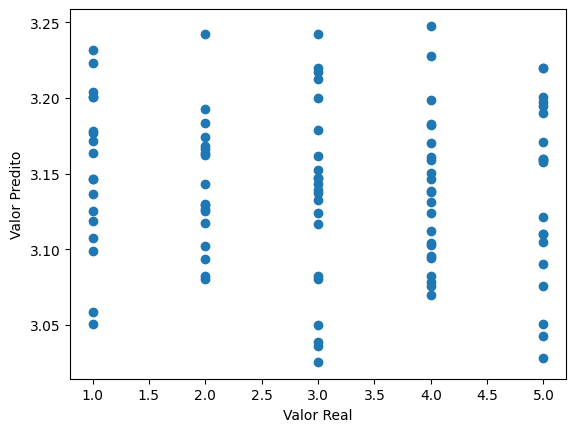

In [117]:
plt.scatter(y_test,y_test_predito)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')

In [120]:
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_test_predito - y_test)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(y_test, y_test_predito))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(y_test, y_test_predito))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(y_test, y_test_predito)))
print("R2-score: %.2f" % r2_score(y_test_predito , y_test) )

Soma dos Erros ao Quadrado (SSE): 194 
Erro Quadrático Médio (MSE): 1.92
Erro Médio Absoluto (MAE): 1.18
Raiz do Erro Quadrático Médio (RMSE): 1.39 
R2-score: -682.85


Podemos observar que Regressao Linear possui um pessimo resultado sendo que R2 esta negativo

# Normalizacao de dados - kNN


Normalização Min-Máx - knn

Usando kNN apos normalizacao Min-Max

In [154]:
X = df[['genero', 'orientacao', 'etnia']]
y = df['vulnerabilidade']
print(f"Formato das tabelas de dados {X.shape} e classes {y.shape}")

Formato das tabelas de dados (501, 3) e classes (501,)


In [155]:
scaler_minmax = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler_minmax.fit_transform(X)

scaled_data

array([[0.2       , 0.83333333, 0.4       ],
       [0.8       , 0.33333333, 0.8       ],
       [1.        , 0.        , 0.8       ],
       ...,
       [0.        , 0.        , 1.        ],
       [0.2       , 0.66666667, 0.4       ],
       [0.6       , 0.33333333, 0.8       ]])

In [167]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2)
print(f"Formato das tabelas de dados de treino {X_train.shape} e teste {X_test.shape}")
k = 9
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Predição: {}".format(y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Acerto médio de classificação: ", accuracy)

Formato das tabelas de dados de treino (400, 3) e teste (101, 3)
Predição: [3 3 1 1 5 5 1 4 3 2 2 4 1 5 4 1 1 1 3 3 4 4 1 4 3 3 1 4 4 5 4 3 1 2 2 5 5
 5 1 4 3 1 1 3 3 3 1 3 3 2 2 1 3 2 5 1 5 3 3 2 4 3 4 5 1 3 3 4 3 3 3 3 3 4
 1 3 3 1 5 3 2 4 2 1 1 4 5 3 3 3 4 1 2 1 1 5 2 3 3 4 2]
Acerto médio de classificação:  0.2079207920792079


StandardScaler

In [173]:
X = df[['genero', 'orientacao', 'etnia']]
y = df['vulnerabilidade']
print(f"Formato das tabelas de dados {X.shape} e classes {y.shape}")

Formato das tabelas de dados (501, 3) e classes (501,)


In [174]:
scaler_standard = StandardScaler()

scaled_data = scaler_standard.fit_transform(X)

scaled_data

array([[-0.83025166,  0.98416142, -0.28245868],
       [ 0.89570718, -0.51908514,  0.89191311],
       [ 1.4710268 , -1.52124951,  0.89191311],
       ...,
       [-1.40557127, -1.52124951,  1.479099  ],
       [-0.83025166,  0.48307923, -0.28245868],
       [ 0.32038757, -0.51908514,  0.89191311]])

In [184]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2)
print(f"Formato das tabelas de dados de treino {X_train.shape} e teste {X_test.shape}")
k = 9
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Predição: {}".format(y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Acerto médio de classificação: ", accuracy)

Formato das tabelas de dados de treino (400, 3) e teste (101, 3)
Predição: [4 1 3 4 1 5 1 4 3 2 4 4 4 3 4 2 4 5 3 2 4 3 2 3 2 2 1 2 4 4 3 2 1 4 4 5 1
 3 4 3 5 5 3 5 3 4 1 1 5 2 1 1 2 1 3 5 4 1 3 3 5 5 1 5 4 2 4 4 3 4 3 4 3 2
 1 2 3 5 5 3 4 3 4 1 1 1 1 2 4 2 2 5 5 1 1 2 1 2 4 5 3]
Acerto médio de classificação:  0.25742574257425743


#Normalizacao de dados - Regressao Linear

Min-Max

In [236]:
scaler_minmax = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler_minmax.fit_transform(X)

scaled_data

array([[0.2       , 0.83333333, 0.4       ],
       [0.8       , 0.33333333, 0.8       ],
       [1.        , 0.        , 0.8       ],
       ...,
       [0.        , 0.        , 1.        ],
       [0.2       , 0.66666667, 0.4       ],
       [0.6       , 0.33333333, 0.8       ]])

In [237]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2)
print(f"Formato das tabelas de dados de treino {X_train.shape} e teste {X_test.shape}")

Formato das tabelas de dados de treino (400, 3) e teste (101, 3)


In [238]:
lin_model = LinearRegression()

lin_model.fit(X_train, y_train)

LinearRegression()

In [239]:
y_test_predito = lin_model.predict(X_test)
print("Predição usando regressão, retorna valores continuos: {}".format(y_test_predito))

Predição usando regressão, retorna valores continuos: [3.11341231 3.16277117 3.09776279 3.1246318  3.08345747 3.17090485
 3.09838064 3.1596311  3.10707791 3.11655238 3.12771763 3.04896752
 3.13147554 3.11526244 3.13091195 3.09462272 3.13646915 3.08716114
 3.06590357 3.13775569 3.10399208 3.07969956 3.09091906 3.14902944
 3.14902944 3.13029411 3.08026315 3.1308577  3.13837353 3.04834967
 3.15396879 3.07712307 3.06528573 3.08896042 3.14269504 3.06960724
 3.15021088 3.13579705 3.14959303 3.1596311  3.08340322 3.12081963
 3.16338901 3.15834455 3.12833547 3.05272544 3.14331288 3.12143748
 3.10090287 3.15592743 3.14336714 3.09781705 3.09585841 3.06646716
 3.07835876 3.12143748 3.08211668 3.08839682 3.17404492 3.14583511
 3.13147554 3.0852025  3.10651431 3.05900558 3.15273311 3.07089718
 3.15525534 3.10331999 3.12457755 3.14588937 3.1196382  3.07712307
 3.10090287 3.1596311  3.07969956 3.11217662 3.0915369  3.10023417
 3.06590357 3.09030121 3.07902746 3.10337424 3.15772671 3.1084187
 3.131529

Podemos perceber que kNN teve um resultado melhor, ainda ruim, do que sem a normalizacao de dados

In [240]:
print('(A) Intercepto: ', lin_model.intercept_)
print('(B) Inclinação: ', lin_model.coef_)
if len(lin_model.coef_)>1:
    print('Nossa equação é: Y_pred = {} + {} * X_LSTAT + {} * X_RM'.format(lin_model.intercept_.round(2),lin_model.coef_[0].round(2),lin_model.coef_[1].round(2)) )
else:
        print('Nossa equação é: Y_pred = {} + {} * X_LSTAT'.format(lin_model.intercept_.round(2),lin_model.coef_[0].round(2)))

(A) Intercepto:  3.1583445540547928
(B) Inclinação:  [-0.09058745 -0.0225475   0.01570037]
Nossa equação é: Y_pred = 3.16 + -0.09 * X_LSTAT + -0.02 * X_RM


Text(0, 0.5, 'Valor Predito')

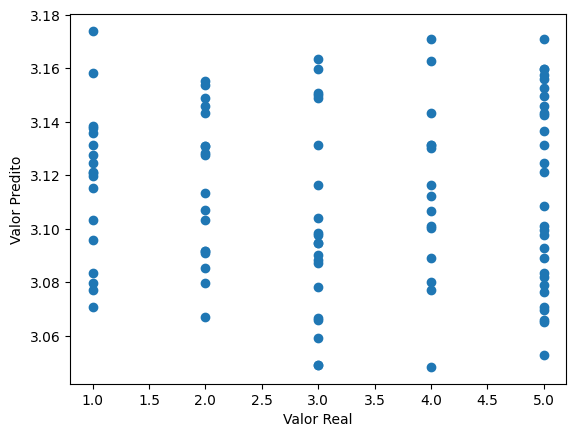

In [241]:
plt.scatter(y_test,y_test_predito)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')

In [242]:
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_test_predito - y_test)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(y_test, y_test_predito))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(y_test, y_test_predito))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(y_test, y_test_predito)))
print("R2-score: %.2f" % r2_score(y_test_predito , y_test) )

Soma dos Erros ao Quadrado (SSE): 218 
Erro Quadrático Médio (MSE): 2.16
Erro Médio Absoluto (MAE): 1.27
Raiz do Erro Quadrático Médio (RMSE): 1.47 
R2-score: -2033.64


StandardScaler

In [243]:
scaler_standard = StandardScaler()

scaled_data = scaler_standard.fit_transform(X)

scaled_data

array([[-0.83025166,  0.98416142, -0.28245868],
       [ 0.89570718, -0.51908514,  0.89191311],
       [ 1.4710268 , -1.52124951,  0.89191311],
       ...,
       [-1.40557127, -1.52124951,  1.479099  ],
       [-0.83025166,  0.48307923, -0.28245868],
       [ 0.32038757, -0.51908514,  0.89191311]])

In [244]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2)
print(f"Formato das tabelas de dados de treino {X_train.shape} e teste {X_test.shape}")

Formato das tabelas de dados de treino (400, 3) e teste (101, 3)


In [245]:
lin_model = LinearRegression()

lin_model.fit(X_train, y_train)

LinearRegression()

In [246]:
y_test_predito = lin_model.predict(X_test)
print("Predição usando regressão, retorna valores continuos: {}".format(y_test_predito))

Predição usando regressão, retorna valores continuos: [3.18314142 3.05936406 3.10832483 3.1278391  2.98675767 3.15978483
 3.05650101 3.05809575 3.20044549 3.09004148 3.13037572 3.15819009
 3.05490628 3.15279042 3.15626893 3.0574429  3.08112592 3.20936106
 3.06255353 3.20617159 3.18122026 3.00978783 3.12751267 3.05936406
 3.04079168 3.13548635 3.20298211 3.16011125 3.24969529 3.08525728
 3.06541658 3.05650101 3.15086926 3.10194588 3.10832483 3.2298546
 3.22793344 3.17962552 3.08717844 3.10828744 3.15373231 3.10861387
 3.10734555 3.13131761 3.20363496 3.07699455 3.03154969 3.20044549
 3.20363496 3.03919694 3.1806048  3.10673009 3.0820678  3.20204023
 3.22825986 3.11339807 3.1278391  3.17676248 3.08239423 3.10194588
 3.20363496 3.15757463 3.15279042 3.0609588  3.15500062 3.1326233
 3.08464181 3.10734555 3.23144934 3.03154969 3.10513535 3.18122026
 3.10832483 3.10926671 3.12943383 3.18154668 3.08079949 3.05650101
 2.99154188 3.01489847 3.06287996 3.08623655 3.13229688 3.08112592
 3.1496009

In [247]:
print('(A) Intercepto: ', lin_model.intercept_)
print('(B) Inclinação: ', lin_model.coef_)
if len(lin_model.coef_)>1:
    print('Nossa equação é: Y_pred = {} + {} * X_LSTAT + {} * X_RM'.format(lin_model.intercept_.round(2),lin_model.coef_[0].round(2),lin_model.coef_[1].round(2)) )
else:
        print('Nossa equação é: Y_pred = {} + {} * X_LSTAT'.format(lin_model.intercept_.round(2),lin_model.coef_[0].round(2)))

(A) Intercepto:  3.1184028814928335
(B) Inclinação:  [ 0.00277191 -0.04914344  0.03977716]
Nossa equação é: Y_pred = 3.12 + 0.0 * X_LSTAT + -0.05 * X_RM


Text(0, 0.5, 'Valor Predito')

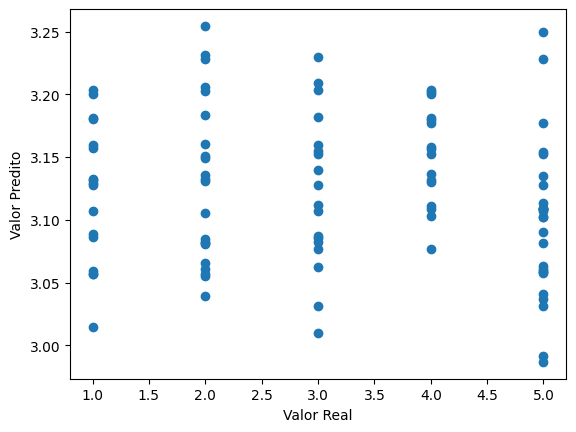

In [248]:
plt.scatter(y_test,y_test_predito)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')

In [249]:
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_test_predito - y_test)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(y_test, y_test_predito))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(y_test, y_test_predito))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(y_test, y_test_predito)))
print("R2-score: %.2f" % r2_score(y_test_predito , y_test) )

Soma dos Erros ao Quadrado (SSE): 218 
Erro Quadrático Médio (MSE): 2.16
Erro Médio Absoluto (MAE): 1.29
Raiz do Erro Quadrático Médio (RMSE): 1.47 
R2-score: -615.26
